<a href="https://colab.research.google.com/github/roycmeghna/DoA-Prediction/blob/main/EEG_50Pat_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
print('TensorFlow version:',
      tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.4.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? False


In [2]:
import os

import cv2


In [3]:
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip drive/My\ Drive/Colab\ Notebooks/DATASETS/EEG/Dataset1_50Pat_Bal.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset1_50Pat_Bal/Light/Patient_7_1782_67_97_HM.jpg  
  inflating: Dataset1_50Pat_Bal/Light/Patient_7_1783_69_97_HM.jpg  
  inflating: Dataset1_50Pat_Bal/Light/Patient_7_1784_69_97_HM.jpg  
  inflating: Dataset1_50Pat_Bal/Light/Patient_7_1785_68_97_HM.jpg  
  inflating: Dataset1_50Pat_Bal/Light/Patient_7_1786_68_97_HM.jpg  
  inflating: Dataset1_50Pat_Bal/Light/Patient_7_1787_68_92_HM.jpg  
  inflating: Dataset1_50Pat_Bal/Light/Patient_7_1788_68_92_HM.jpg  
  inflating: Dataset1_50Pat_Bal/Light/Patient_7_1789_68_92_HM.jpg  
  inflating: Dataset1_50Pat_Bal/Light/Patient_7_1790_69_92_HM.jpg  
  inflating: Dataset1_50Pat_Bal/Light/Patient_7_1791_70_94_HM.jpg  
  inflating: Dataset1_50Pat_Bal/Light/Patient_7_1792_70_94_HM.jpg  
  inflating: Dataset1_50Pat_Bal/Light/Patient_7_1793_68_94_HM.jpg  
  inflating: Dataset1_50Pat_Bal/Light/Patient_7_1794_68_94_HM.jpg  
  inflating: Dataset1_50Pat_Bal/Light/Patient_7_1795_67_92_HM.jpg

In [6]:

img_rows=51
img_cols=51
num_channel=3


In [7]:
PATH = os.getcwd()
# Define data path
#data_path = 'TRAINECGPPG'
data_path='Dataset1_50Pat_Bal'
#data_path='ECG_50Pat_BAL'
data_dir_list = os.listdir(data_path)
data_dir_list

['Ok', 'Deep', 'Light']

In [8]:
for d in data_dir_list:
  print(d)
  print(os.listdir(data_path+'/' +d))
    

Ok
['Patient_15_1004_46_92_HM.jpg', 'Patient_30_8_47_97_HM.jpg', 'Patient_34_134_42_78_HM.jpg', 'Patient_32_1078_43_100_HM.jpg', 'Patient_2_1046_41_100_HM.jpg', 'Patient_36_126_48_71_HM.jpg', 'Patient_25_228_42_92_HM.jpg', 'Patient_37_1117_45_100_HM.jpg', 'Patient_45_1040_41_96_HM.jpg', 'Patient_31_1108_51_94_HM.jpg', 'Patient_26_1175_43_85_HM.jpg', 'Patient_42_1151_43_100_HM.jpg', 'Patient_20_262_44_78_HM.jpg', 'Patient_27_1142_47_97_HM.jpg', 'Patient_8_1008_41_83_HM.jpg', 'Patient_39_234_58_100_HM.jpg', 'Patient_4_16_58_90_HM.jpg', 'Patient_45_1460_41_97_HM.jpg', 'Patient_25_189_48_95_HM.jpg', 'Patient_21_1054_55_91_HM.jpg', 'Patient_2_106_43_100_HM.jpg', 'Patient_15_1048_59_100_HM.jpg', 'Patient_25_218_45_90_HM.jpg', 'Patient_25_193_47_95_HM.jpg', 'Patient_40_1075_43_100_HM.jpg', 'Patient_2_104_44_100_HM.jpg', 'Patient_19_1897_44_97_HM.jpg', 'Patient_20_946_51_97_HM.jpg', 'Patient_44_181_41_100_HM.jpg', 'Patient_24_78_60_71_HM.jpg', 'Patient_15_1029_53_100_HM.jpg', 'Patient_35_276_4

In [9]:
num_classes = 3

labels_name={'Light':0,'Ok':1,'Deep':2}

img_data_list=[]
labels_list = []


In [10]:
for dataset in data_dir_list:
  img_list=os.listdir(data_path+'/' +dataset)
  print ('Loading the images of dataset-'+'{}\n'.format(dataset))
  label = labels_name[dataset]
  for img in img_list:
    input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
    input_img_resize=cv2.resize(input_img,(128,128))
    img_data_list.append(input_img_resize)
    labels_list.append(label)

Loading the images of dataset-Ok

Loading the images of dataset-Deep

Loading the images of dataset-Light



In [11]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255.
print (img_data.shape)


(13500, 128, 128, 3)


# Data preprocessing

In [12]:
import keras
import keras.utils
from keras import utils as np_utils

labels = np.array(labels_list)
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding
Y = keras.utils.to_categorical(labels, num_classes)


(array([0, 1, 2]), array([4500, 4500, 4500]))


In [13]:
# from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#Shuffle the dataset
# x,y = shuffle(img_data,Y)
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.1, random_state=123)

In [14]:
input_shape=img_data[0].shape
input_shape

(128, 128, 3)

In [15]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(12150, 128, 128, 3) (12150, 3)
(1350, 128, 128, 3) (1350, 3)


# **10 layered CNN Model**

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    
    def add_conv_block(model, num_filters):
        
        model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu', padding='valid'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.2))

        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(128, 128, 3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 96)
    model = add_conv_block(model, 128)
    model = add_conv_block(model, 256)


    model.add(Flatten())
    model.add(Dense(3, activation='softmax'))

  
    return model

In [17]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 63, 63, 64)        2

# **visualise CNN architecture**

In [ ]:
!pip install git+https://github.com/paulgavrikov/visualkeras

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-t7m6sehb
  Running command git clone -q https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-t7m6sehb
     |████████████████████████████████| 798kB 10.0MB/s 
  Created wheel for visualkeras: filename=visualkeras-0.0.2-cp37-none-any.whl size=12960 sha256=d9129ef56674a9535c4c1ef691fe9fbcaa26fe6210a9a0d79152f9b5272668c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-cghf8uxk/wheels/63/ee/ff/e163fd012b516d0922da126313ce2133e97f712726dc4dc722
Successfully built visualkeras


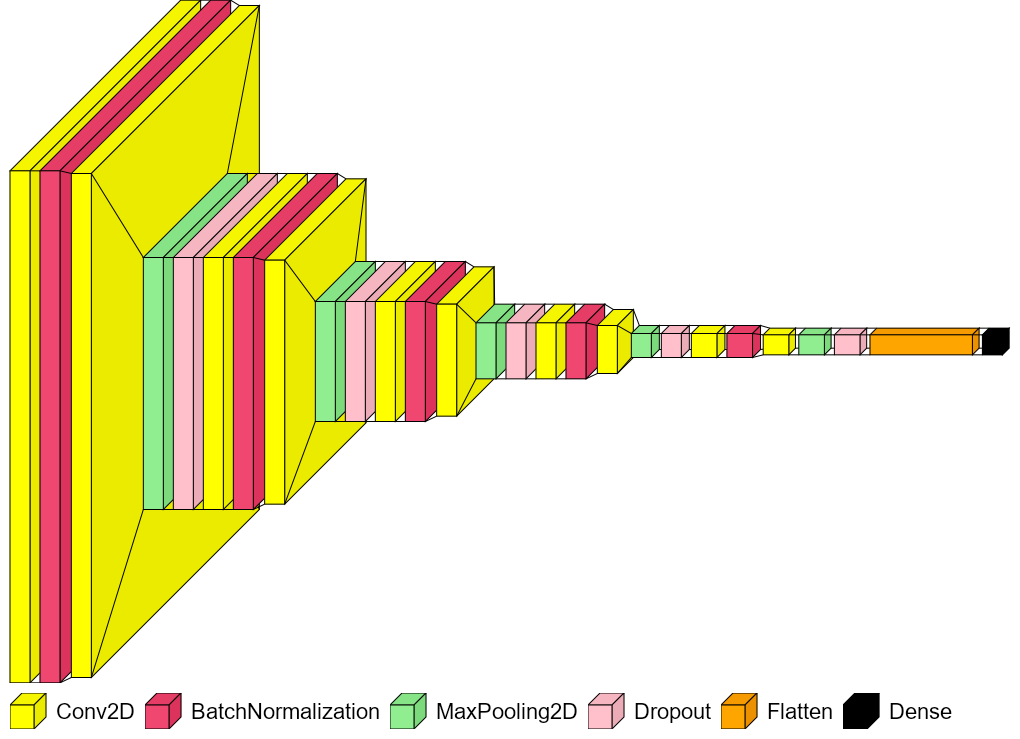

In [ ]:
import visualkeras
from PIL import ImageFont
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'yellow'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'lightgreen'
color_map[Dense]['fill'] = 'black'
color_map[Flatten]['fill'] = 'orange'

font = ImageFont.truetype("arial.ttf", 22)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font,color_map=color_map)  # font is optional!

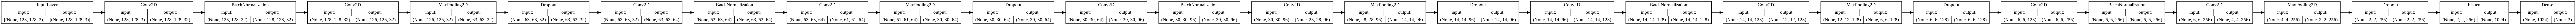

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='10l.png',show_shapes=True, show_layer_names=False, rankdir='LR')

In [ ]:
if not os.path.isdir('drive/My Drive/Colab Notebooks/DATASETS/EPE/MODELS/25Pat_10conv'):
    os.mkdir('drive/My Drive/Colab Notebooks/DATASETS/EPE/MODELS/25Pat_10conv')


# k fold - adam 0.001

In [ ]:
if not os.path.isdir('drive/My Drive/Colab Notebooks/DATASETS/EEG/MODELS/50Pat_KFold'):
    os.mkdir('drive/My Drive/Colab Notebooks/DATASETS/EEG/MODELS/50Pat_KFold')


#KAGGLE

In [ ]:
# Model configuration
num_folds = 10

# Define per-fold score containers
acc_per_fold_v = []
loss_per_fold_v = []

acc_per_fold_t = []
loss_per_fold_t = []

model_history = []

# Merge inputs and targets
inputs = img_data
targets = Y

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  # print(train)
  # print(test)
  # print('---')
  model = tf.keras.models.load_model('drive/My Drive/Colab Notebooks/DATASETS/EPE/MODELS/50Pat_KFold/Epochs50.h5')

	# There can be other callbacks, but just showing one because it involves the model name
	# This saves the best model

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  h=model.fit(
  inputs[train],targets[train],
  epochs=50,batch_size=64,
  initial_epoch=0, callbacks=[tf.keras.callbacks.ModelCheckpoint('drive/My Drive/Colab Notebooks/DATASETS/EEG/MODELS/50Pat_KFold/model_Try_'+str(fold_no)+'.h5', 
                                            save_best_only=True, 
                                            save_weights_only=True,
                                            monitor='accuracy')] ,
              verbose=1    )
  model_history.append(h)
  
  # LOAD BEST MODEL to evaluate the performance of the model
  model.load_weights("drive/My Drive/Colab Notebooks/DATASETS/EEG/MODELS/50Pat_KFold/model_Try_"+str(fold_no)+".h5")
  

  # Generate generalization metrics for validation
  scores_v = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold  validation {fold_no}: {model.metrics_names[0]} of {scores_v[0]}; {model.metrics_names[1]} of {scores_v[1]*100}%')
  acc_per_fold_v.append(scores_v[1] * 100)
  loss_per_fold_v.append(scores_v[0])

  # Generate generalization metricsfor test
  scores_t = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold test {fold_no}: {model.metrics_names[0]} of {scores_t[0]}; {model.metrics_names[1]} of {scores_t[1]*100}%')
  acc_per_fold_t.append(scores_t[1] * 100)
  loss_per_fold_t.append(scores_t[0])
  
  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores for validation ==
print('------------------------------------------------------------------------')
print(' Validation Score per fold')
for i in range(0, len(acc_per_fold_v)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold_v[i]} - Accuracy: {acc_per_fold_v[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold_v)} (+- {np.std(acc_per_fold_v)})')
print(f'> Loss: {np.mean(loss_per_fold_v)}')
print('------------------------------------------------------------------------')

# == Provide average scores for test ==
print('------------------------------------------------------------------------')
print(' Test Score per fold')
for i in range(0, len(acc_per_fold_t)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold_t[i]} - Accuracy: {acc_per_fold_t[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold_t)} (+- {np.std(acc_per_fold_t)})')
print(f'> Loss: {np.mean(loss_per_fold_t)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
190/190 [==============================] - 1306s 7s/step - loss: 0.8298 - accuracy: 0.6205
Epoch 2/50
127/190 [===================>..........] - ETA: 7:11 - loss: 0.7449 - accuracy: 0.6458

#epochs 10 to 50

In [ ]:
# Model configuration
num_folds = 3

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
model_history = []

# Merge inputs and targets
inputs = img_data
targets = Y

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    
  # model=create_model()
  # # Compile the model
  # opt=tf.keras.optimizers.Adam(lr=0.001)
  # model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  
  model = tf.keras.models.load_model('drive/My Drive/Colab Notebooks/DATASETS/EPE/MODELS/50Pat_KFold/Epochs50.h5')

	# There can be other callbacks, but just showing one because it involves the model name
	# This saves the best model

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  h=model.fit(
  x_train,y_train,
  validation_split=0.01,
  epochs=5,batch_size=64,
  shuffle=True,
  initial_epoch=0, callbacks=[tf.keras.callbacks.ModelCheckpoint('drive/My Drive/Colab Notebooks/DATASETS/EEG/MODELS/50Pat_KFold/epochs1to5_'+str(fold_no)+'.h5', 
                                            save_best_only=True, 
                                            save_weights_only=True,
                                            monitor='val_accuracy')] ,
              verbose=1    )
  model_history.append(h)
  
  # LOAD BEST MODEL to evaluate the performance of the model
  model.load_weights("drive/My Drive/Colab Notebooks/DATASETS/EEG/MODELS/50Pat_KFold/epochs1to5_"+str(fold_no)+".h5")
  

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  
  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
188/188 [==============================] - 18s 96ms/step - loss: 0.8268 - accuracy: 0.6165 - val_loss: 0.9054 - val_accuracy: 0.4918
Epoch 2/5
188/188 [==============================] - 18s 95ms/step - loss: 0.7377 - accuracy: 0.6583 - val_loss: 0.8323 - val_accuracy: 0.5902
Epoch 3/5
188/188 [==============================] - 18s 95ms/step - loss: 0.6777 - accuracy: 0.6917 - val_loss: 1.1436 - val_accuracy: 0.5246
Epoch 4/5
188/188 [==============================] - 18s 96ms/step - loss: 0.6475 - accuracy: 0.7061 - val_loss: 0.7235 - val_accuracy: 0.7131
Epoch 5/5
188/188 [==============================] - 18s 96ms/step - loss: 0.6251 - accuracy: 0.7182 - val_loss: 2.2616 - val_accuracy: 0.4344
Score for fold 1: loss of 0.758237898349762; accuracy of 66.81481599807739%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
188/1

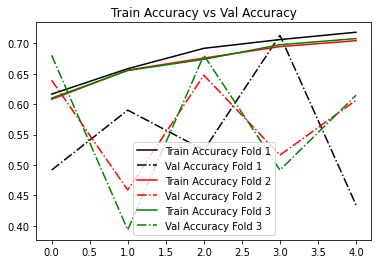

In [ ]:
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
plt.plot(model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
plt.plot(model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
plt.plot(model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")
plt.plot(model_history[2].history['accuracy'], label='Train Accuracy Fold 3', color='green', )
plt.plot(model_history[2].history['val_accuracy'], label='Val Accuracy Fold 3', color='green', linestyle = "dashdot")
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
#function to draw confusion matrix
def draw_confusion_matrix(true,preds):
    conf_matx = confusion_matrix(true, preds)
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
    plt.show()

## Conf Matrix and classification Report

In [ ]:
  model=create_model()
  model.load_weights('drive/My Drive/Colab Notebooks/DATASETS/EEG/MODELS/50Pat_KFold/epochs1to5_2.h5')
  # Compile the model
  opt=tf.keras.optimizers.Adam(lr=0.001)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### **Confusion Matrix (Train)**

In [ ]:
model.evaluate(x_train,y_train)

383/383 [==============================] - 6s 14ms/step - loss: 0.1904 - accuracy: 0.9508


[0.187237948179245, 0.9530228972434998]

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [ ]:
# preds_tr1 = model50.predict(x_train)
preds_tr1 = model.predict(x_train)
preds_tr_cf1 = np.argmax(preds_tr1,axis=1)

In [ ]:
y_tr_cf1=np.argmax(y_train,axis=1)


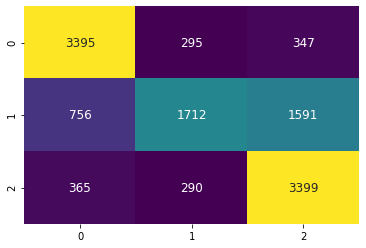

In [ ]:
draw_confusion_matrix(y_tr_cf1, preds_tr_cf1)

In [ ]:
print(classification_report(y_tr_cf1, preds_tr_cf1, target_names=['Anesthesia Deep', 'Anesthesia Light', 'Anesthesia Ok']))

                  precision    recall  f1-score   support

 Anesthesia Deep       0.95      0.92      0.94      4140
Anesthesia Light       0.98      0.96      0.97      4050
   Anesthesia Ok       0.93      0.98      0.96      4050

        accuracy                           0.95     12240
       macro avg       0.95      0.95      0.95     12240
    weighted avg       0.95      0.95      0.95     12240



In [ ]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it’s categorical variable



#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix- ECG&PPG subplot ',
   cmap=plt.cm.Blues):
 
  #Add Normalization Option
  '''prints pretty confusion metric with normalization option '''
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
 
  #print(cm)
 
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
 
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label') 



In [ ]:
cm= confusion_matrix(y_tr_cf1, preds_tr_cf1)

Normalized confusion matrix


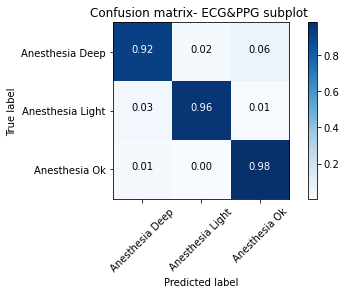

In [ ]:
plot_confusion_matrix(cm,['Anesthesia Deep', 'Anesthesia Light', 'Anesthesia Ok'],normalize=True)

### **Confusion Matrix (Test)**

In [ ]:
model.evaluate(x_test,y_test)

43/43 [==============================] - 32s 46ms/step - loss: 0.2029 - accuracy: 0.9409


[0.21437516808509827, 0.945588231086731]

In [ ]:

preds_test1 = model.predict(x_test)
preds_test_cf1 = np.argmax(preds_test1,axis=1)

In [ ]:
y_test_cf1=np.argmax(y_test,axis=1)
# y_test_cf2=y_test_cf1.tolist()

In [ ]:
print(classification_report(y_test_cf1, preds_test_cf1, target_names=['Anesthesia Deep', 'Anesthesia Light', 'Anesthesia Ok']))

                  precision    recall  f1-score   support

 Anesthesia Deep       0.94      0.91      0.93       477
Anesthesia Light       0.98      0.95      0.96       462
   Anesthesia Ok       0.92      0.98      0.95       421

        accuracy                           0.95      1360
       macro avg       0.95      0.95      0.95      1360
    weighted avg       0.95      0.95      0.95      1360



In [ ]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it’s categorical variable
from sklearn.metrics import classification_report, confusion_matrix
import itertools


#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix (TM-CNN)',
   cmap=plt.cm.Blues):
 
  #Add Normalization Option
  '''prints pretty confusion metric with normalization option '''
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
 
  #print(cm)
 
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
 
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label') 



In [ ]:
cm= confusion_matrix(y_test_cf1, preds_test_cf1)

Normalized confusion matrix


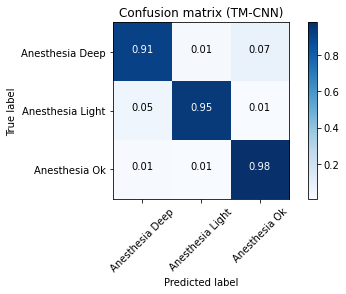

In [ ]:
plot_confusion_matrix(cm,['Anesthesia Deep', 'Anesthesia Light', 'Anesthesia Ok'],normalize=True)

#epochs 50 to 80
( Avg =91%)

In [ ]:
# Model configuration
num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = img_data
targets = Y

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    
  model=create_model()
  model.load_weights('drive/My Drive/Colab Notebooks/DATASETS/EPE/MODELS/50Pat_KFold/epochs10to50_4.h5')
  # Compile the model
  opt=tf.keras.optimizers.Adam(lr=0.001)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  
	# There can be other callbacks, but just showing one because it involves the model name
	# This saves the best model

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  h=model.fit(
  x_train,y_train,
  # validation_split=0.01,
  epochs=80,batch_size=64,
  initial_epoch=50, callbacks=[tf.keras.callbacks.ModelCheckpoint('drive/My Drive/Colab Notebooks/DATASETS/EPE/MODELS/50Pat_KFold/epochs50to80_'+str(fold_no)+'.h5', 
                                            save_best_only=True, 
                                            save_weights_only=True,
                                            monitor='accuracy')]
                  )
  
  # LOAD BEST MODEL to evaluate the performance of the model
  model.load_weights("drive/My Drive/Colab Notebooks/DATASETS/EPE/MODELS/50Pat_KFold/epochs50to80_"+str(fold_no)+".h5")
  

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  
  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 51/80
192/192 [==============================] - 20s 98ms/step - loss: 0.1693 - accuracy: 0.9464
Epoch 52/80
192/192 [==============================] - 19s 97ms/step - loss: 0.1162 - accuracy: 0.9590
Epoch 53/80
192/192 [==============================] - 19s 97ms/step - loss: 0.1194 - accuracy: 0.9596
Epoch 54/80
192/192 [==============================] - 18s 96ms/step - loss: 0.1001 - accuracy: 0.9619
Epoch 55/80
192/192 [==============================] - 18s 95ms/step - loss: 0.0839 - accuracy: 0.9714
Epoch 56/80
192/192 [==============================] - 18s 96ms/step - loss: 0.0759 - accuracy: 0.9732
Epoch 57/80
192/192 [==============================] - 19s 96ms/step - loss: 0.0864 - accuracy: 0.9672
Epoch 58/80
192/192 [==============================] - 18s 96ms/step - loss: 0.0976 - accuracy: 0.9651
Epoch 59/80
192/192 [==============================] - 18s 96ms/step - loss: 0.

In [ ]:
#10 mins per fold

In [ ]:
# Model configuration
num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = img_data
targets = Y

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    
  model=create_model()
  model.load_weights('drive/My Drive/Colab Notebooks/DATASETS/EPE/MODELS/50Pat_KFold/epochs10to50_4.h5')
  # Compile the model
  opt=tf.keras.optimizers.Adam(lr=0.001)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  
	# There can be other callbacks, but just showing one because it involves the model name
	# This saves the best model

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  h=model.fit(
  x_train,y_train,
  # validation_split=0.01,
  epochs=80,batch_size=64,
  initial_epoch=50, callbacks=[tf.keras.callbacks.ModelCheckpoint('drive/My Drive/Colab Notebooks/DATASETS/EPE/MODELS/50Pat_KFold/epochs50to80_2_'+str(fold_no)+'.h5', 
                                            save_best_only=True, 
                                            save_weights_only=True,
                                            monitor='accuracy')]
                  )
  
  # LOAD BEST MODEL to evaluate the performance of the model
  model.load_weights("drive/My Drive/Colab Notebooks/DATASETS/EPE/MODELS/50Pat_KFold/epochs50to80_2_"+str(fold_no)+".h5")
  

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  
  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 51/80
192/192 [==============================] - 53s 96ms/step - loss: 0.1712 - accuracy: 0.9514
Epoch 52/80
192/192 [==============================] - 18s 93ms/step - loss: 0.1117 - accuracy: 0.9635
Epoch 53/80
192/192 [==============================] - 18s 93ms/step - loss: 0.1077 - accuracy: 0.9625
Epoch 54/80
192/192 [==============================] - 18s 94ms/step - loss: 0.1000 - accuracy: 0.9648
Epoch 55/80
192/192 [==============================] - 18s 94ms/step - loss: 0.0939 - accuracy: 0.9677
Epoch 56/80
192/192 [==============================] - 18s 94ms/step - loss: 0.0802 - accuracy: 0.9698
Epoch 57/80
192/192 [==============================] - 18s 94ms/step - loss: 0.0922 - accuracy: 0.9648
Epoch 58/80
192/192 [==============================] - 18s 94ms/step - loss: 0.0823 - accuracy: 0.9702
Epoch 59/80
192/192 [==============================] - 18s 95ms/step - loss: 0.

In [ ]:
#10 mins per fold

## Conf matrix and classification report

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [ ]:
  model=create_model()
 
  # Compile the model
  opt=tf.keras.optimizers.Adam(lr=0.001)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
#  model.load_weights('drive/My Drive/Colab Notebooks/DATASETS/EPE/MODELS/50Pat_KFold/epochs50to80_6.h5')
model.load_weights('drive/My Drive/Colab Notebooks/DATASETS/EPE/MODELS/50Pat_KFold/epochs50to80_2_1.h5')

### **Confusion Matrix (Train)**

In [ ]:
loss,acc=model.evaluate(x_train,y_train,batch_size=128)
print('Loss=',loss)
print('Accurary=',acc*100,'%')

96/96 [==============================] - 193s 2s/step - loss: 0.2896 - accuracy: 0.9269
Loss= 0.2896125316619873
Accurary= 92.68791079521179 %


In [ ]:
# preds_tr1 = model50.predict(x_train)
preds_tr1 = model.predict(x_train)
preds_tr_cf1 = np.argmax(preds_tr1,axis=1)

In [ ]:
y_tr_cf1=np.argmax(y_train,axis=1)


In [ ]:
print(classification_report(y_tr_cf1, preds_tr_cf1, target_names=['Anesthesia Deep', 'Anesthesia Ok', 'Anesthesia Light']))

                  precision    recall  f1-score   support

   Anesthesia Ok       0.99      0.97      0.98      4140
 Anesthesia Deep       0.99      0.99      0.99      4050
Anesthesia Light       0.98      0.99      0.98      4050

        accuracy                           0.98     12240
       macro avg       0.98      0.98      0.98     12240
    weighted avg       0.98      0.98      0.98     12240



In [ ]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it’s categorical variable
from sklearn.metrics import classification_report, confusion_matrix
import itertools


#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
  #Add Normalization Option
  '''prints pretty confusion metric with normalization option '''
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
 
  #print(cm)
 
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
 
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label') 



In [ ]:
cm= confusion_matrix(y_tr_cf1, preds_tr_cf1)

Normalized confusion matrix


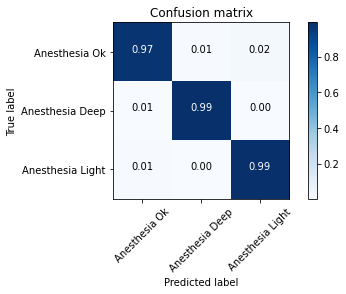

In [ ]:
plot_confusion_matrix(cm,['Anesthesia Deep', 'Anesthesia Ok', 'Anesthesia Light'],normalize=True)

### **Confusion Matrix (Test)**

In [ ]:
loss,acc=model.evaluate(x_test,y_test,batch_size=64)
print('Loss=',loss)
print('Accurary=',acc*100,'%')

22/22 [==============================] - 22s 985ms/step - loss: 0.2900 - accuracy: 0.9243
Loss= 0.28996479511260986
Accurary= 92.42647290229797 %


In [ ]:

preds_test1 = model.predict(x_test)
preds_test_cf1 = np.argmax(preds_test1,axis=1)

In [ ]:
y_test_cf1=np.argmax(y_test,axis=1)
# y_test_cf2=y_test_cf1.tolist()

In [ ]:
print(classification_report(y_test_cf1, preds_test_cf1, target_names=['Anesthesia Ok', 'Anesthesia Deep', 'Anesthesia Light']))

                  precision    recall  f1-score   support

   Anesthesia Ok       0.86      0.96      0.91       460
 Anesthesia Deep       1.00      0.83      0.91       450
Anesthesia Light       0.94      0.98      0.96       450

        accuracy                           0.92      1360
       macro avg       0.93      0.92      0.92      1360
    weighted avg       0.93      0.92      0.92      1360



In [ ]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it’s categorical variable
from sklearn.metrics import classification_report, confusion_matrix
import itertools


#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
  #Add Normalization Option
  '''prints pretty confusion metric with normalization option '''
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
 
  #print(cm)
 
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
 
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label') 



In [ ]:
cm= confusion_matrix(y_test_cf1, preds_test_cf1)

Normalized confusion matrix


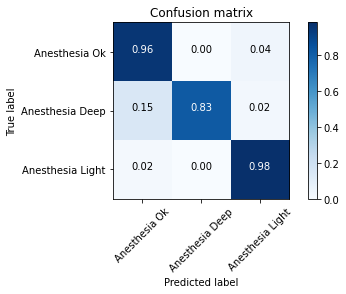

In [ ]:
plot_confusion_matrix(cm,['Anesthesia Ok', 'Anesthesia Deep', 'Anesthesia Light'],normalize=True)